<a href="https://colab.research.google.com/github/wenko99/Standalone_DDL/blob/master/Lec06/Lec06_EMNIST_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EMNIST Data - Balanced

![picture](https://imgur.com/MJo1Kd0.jpg)

<br/>

오늘의 코딩실습은 **EMNIST Classification**입니다.

<br/>

EMNIST는 숫자뿐만 아니라 알파벳 손글씨들도 포함하고 있는 Dataset입니다. Data는 MNIST처럼 28x28 크기의 Grayscale Image입니다. 특히, 오늘 다룰 Dataset은 EMNIST Balanced Dataset인데요, 모든 Label들에 대한 Data가 골고루 들어가 있는 Dataset입니다.

<br/>

오늘의 목표는, EMNIST Balanced Dataset을 받아서 전처리를 해주고,

직접 Model을 Design하여 Train시키는 것입니다.

이때, Hyperparameter들도 적절히 선택해 주어야겠죠!!

이렇게 학습시킨 Model을 External File로 Export할 것입니다.

그리고 그 Export한 File을 제출해 주시면, 저희가 만든 Test set으로 정확도를 측정하겠습니다.

가장 정확도가 높은 Model을 만드신 분께는 소정의 상품을 드릴 예정입니다!! > 0 <

상상만 해도 신나지 않나요?

<br/>

오늘 해야 하는 일들의 목록입니다. 쭉 읽어볼까요?

1. Upload data onto Colab

2. Check data shape

3. Preprocess data : Data, Label 구분 / Training set, Validation set으로 구분 / Data Shape 적절히 바꾸기

4. Visualize data

5. Construct model : MLP or CNN?

6. Train model

7. Choose hyperparameters

8. Export model architecture / parameters as an external file

9. Check if exported model and current model are same

10. Get prediction results from live canvas

<br/>

**Data can be downloaded from [here](http://sendanywhe.re/1PAOPWFL)**

<br/>

##Upload Data

<br/>

본인의 Google Drive의 메인 화면에 EMNIST라는 폴더를 만들어 주시고, 그 안에 emnist-balanced-train.csv 파일을 넣어주세요!

아래의 코드 셀을 실행시켜서, 위에서 받은 EMNIST Balanced Dataset을 Colab에 Upload해주세요.

Authorization Link가 나올텐데, 링크를 타고 가셔서 접근을 허용한 후, 나오는 Authorization Code를 출력 화면의 빈칸에 넣어 주세요.

실행 결과, emnist-balanced-train.csv가 나오면 잘된 것입니다.


<br/>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd drive/My Drive/EMNIST

/content/drive/My Drive/EMNIST


In [0]:
ls

emnist-balanced-train.csv     jaehyunlee_weights.h5
jaehyunlee_architecture.json  test.jpg


##Read and Process Data

<br/>

csv file로부터 data와 labels를 만들어봅시다!

1. 위에서 Upload한 csv file을 읽어옵니다. **emnist-balanced-train.csv** 를 불러와 주세요!!!

2. 데이터를 무작위로 섞습니다. (이때, 매번 무작위로 바뀌는 것을 막기위해 seed를 추가합니다.)

3. 읽은 csv file을 Label과 Data(Image의 pixel value)로 분리해 줍니다. csv file의 각 행은 785개의 열로 되어 있는데, 첫 번째 열이 Label이고, 나머지가 Data입니다!  Data는 **emnist_data**에, Label은 **emnist_labels**에 저장해 줍니다.

4. Data의 값들을 255로 나눠줍니다.

5. numpy.ndarray type으로 바꾸어줍니다.

6. Train set / Validation set으로 구분해 줍니다. 아까 **emnist_data**를 **train_data**, **val_data**로 나누고, **emnist_labels**를 **train_labels**, **val_labels**로 나누면 되겠죠? (Test set은 나중에 따로 제공할 것입니다.)

<br/>

Preprocessing 이후 Shape는 다음과 같아야 할 것입니다.

<br/>

emnist_data = $(112800, 784)$

emnist_labels = $(112800, )$

train_data = $(78960, 784)$

train_labels = $(78960, )$

val_data = $(33840, 784)$

val_labels = $(33840, )$

<br/>

** **useful hint** : [[Lec02_NoTrain](Lec02/Lec02_NoTrain_sklearn.ipynb)]에서 Iris Data가 담긴 csv file을 어떻게 읽어왔나 살펴볼까요?

<br/>

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Read csv file
df = pd.read_csv('emnist-balanced-train.csv', header=None)

# Shuffle Dataset
np.random.seed(81)
df = df.reindex(np.random.permutation(df.index))


# Separate into Data / Label
emnist_data = df.iloc[:, 1:].values / 255
emnist_labels = df.iloc[:, 0].values

# Separate into Train / Val
train_data = emnist_data[:78960]
train_labels = emnist_labels[:78960]
val_data = emnist_data[78960:]
val_labels = emnist_labels[78960:]

In [0]:
# Check Shape
print('Train Data Shape : ' + str(train_data.shape))
print('Train Label Shape : ' + str(train_labels.shape))
print('Validation Data Shape : ' + str(val_data.shape))
print('Validation Label Shape : ' + str(val_labels.shape))

Train Data Shape : (78960, 784)
Train Label Shape : (78960,)
Validation Data Shape : (33840, 784)
Validation Label Shape : (33840,)


##Data Visualization

<br/>

전처리한 Data가 실제로 어떻게 생겼는지를 볼까요?

<br/>

아래의 코드는 [[Lec04_Keras_Tutorial](Lec04/Lec04_Keras_Tutorial.ipynb)]에서 가져온 것입니다.

<br/>

그때 데이터는 MNIST 데이터셋이었습니다.

즉, train_data는 $(78960, 28, 28)$ 의 shape를 가지고,

train_labels는 $(78960,)$ 의 shape를 가졌습니다.

하지만 우리가 지금 가지고 있는 train_data, val_data는  $(?, 784)$의 shape입니다.

따라서 아래 코드를 실행하려면 train_data, val_data를 $(?, 28, 28)$로 바꿔줘야 할 것 같네요!

<br/>

이제 Shape는 다음과 같아야 할 것입니다.

train_data = $(78960, 28, 28)$

train_labels = $(78960, )$

val_data = $(33840, 28, 28)$

val_labels = $(33840, )$

<br/>

또, Data의 Shape만 바꿔서 Visualization을 해보면, 글씨가 대각선으로 뒤집혀 있는 것을 확인하실 수 있습니다!

아직 확인하지 않으셨다면, 먼저 확인하고 오세요 ; )

원래 모양대로 출력하려면, Data의 축을 바꿔줄 필요가 있겠죠?

형태는 똑같이 $(78960, 28, 28)$, $(33840, 28, 28)$이지만, 두번째와 세번째 축을 서로 바꿔주는 Transpose 연산을 해야 할 것입니다!

<br/>

** **useful hint** : numpy의 reshape, transpose를 이용한다면..? [[Lec0_Colab&Numpy_Tutorial](https://github.com/wenko99/Standalone_DDL/blob/master/Lec01/Lec01_Colab_&_Numpy_Tutorial.ipynb)]에 있을지도 모르겠네요!

<br/>

In [0]:
# Reshape Vector into Matrix
train_data = train_data.reshape(78960, 28, 28)
val_data = val_data.reshape(33840, 28, 28)
train_data = np.transpose(train_data, (0, 2, 1))
val_data = np.transpose(val_data, (0, 2, 1))

In [0]:
# Check Shape
print('Train Data Shape : ' + str(train_data.shape))
print('Train Label Shape : ' + str(train_labels.shape))
print('Validation Data Shape : ' + str(val_data.shape))
print('Validation Label Shape : ' + str(val_labels.shape))

Train Data Shape : (78960, 28, 28)
Train Label Shape : (78960,)
Validation Data Shape : (33840, 28, 28)
Validation Label Shape : (33840,)


In [0]:
import matplotlib.pyplot as plt

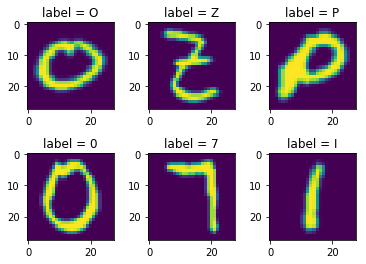

The shape of the image is (28, 28)


In [0]:
ascii_idx = [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 97, 98, 100, 101, 102, 103, 104, 110, 113, 114, 116]

idx = 0

fig = plt.figure()
for i in range(6):
    ax = fig.add_subplot(2, 3, i + 1)
    image = train_data[idx]
    ax.imshow(image)
    ax.set_title("label = {}".format(chr(ascii_idx[train_labels[idx]])))
    idx += 1
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.show()

print("The shape of the image is {}".format(image.shape))

##Construct Model

<br/>

Keras를 통해 쉽게 할 수 있죠>

<br/>

이때,

Loss Function은 무엇을 이용해야 할까요?

sparse_categorical_crossentropy와 categorical_crossentropy가 어떻게 달랐을까요?

Cross entropy loss를 이용하지 않는 다른 방법은 없을까요..?

또, CNN을 적용하려면, Image가 Matrix가 아닌 Tensor가 되어야겠죠? Grayscale Image이므로, Channel은 1개입니다.

<br/>

따라서, 이제 train_data와 val_data의 shape는,

train_data = $(78960, 28, 28, 1)$

train_labels = $(78960, )$

val_data = $(33840, 28, 28, 1)$

val_labels = $(33840, )$

이 되어야겠죠?

<br/>

채점 시 Input Shape는 $(number of data, 28, 28, 1)$을 기준으로 할 것입니다.

따라서, CNN이 아닌 MLP를 만들고 싶으시면, Model의 맨 앞에 Flatten Layer를 추가해 주세요!

tf.keras.layers.Flatten()을 Model의 맨 앞에 추가하면 되겠죠?

<br/>

In [0]:
# Reshape Data so that Conv2D is applicable


In [0]:
# Check Shape
print('Train Data Shape : ' + str(train_data.shape))
print('Train Label Shape : ' + str(train_labels.shape))
print('Validation Data Shape : ' + str(val_data.shape))
print('Validation Label Shape : ' + str(val_labels.shape))

Train Data Shape : (15000, 28, 28, 1)
Train Label Shape : (15000,)
Validation Data Shape : (3800, 28, 28, 1)
Validation Label Shape : (3800,)


###Hyperparameters Under Consideration

<br/>

**Activation**

RELU...? Sigmoid...? Tanh...? Maxout...?

Can be added via, **tf.keras.layers.Dense( ... , activation=?)**

? 안을 적절한 Activation Function으로 채우면 됩니다!

Activation Function의 종류는, 아래 Documentation에 잘 정리되어 있습니다.

[[Keras Activation Documentation](https://keras.io/activations/)]

<br/>

**Regularization**

L1 or L2 Regularizer...? Regularization Strength...?

Can be added via, **tf.keras.layers.Dense( ... , kernel_regularizer=tf.keras.regularizers.l2(0.01))**

괄호 안의 숫자가 Regularization Strength입니다. L1을 쓰려면, **regularizers.l1**을 쓰면 되겠죠?

[[Keras Regularizer Documentation](https://keras.io/regularizers/)]

<br/>

**Weight Initialization**

How should we set the initial values of the weight...?

Can be added via, **tf.keras.layers.Dense( ... , kernel_initializers=?)**

? 를 적절한 Initializer로 채워주면 됩니다.

Normal Distribution을 사용하려면, **tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)**

Xavier Initialization을 사용하려면, **tf.keras.initializers.glorot_normal(seed=None)**

을 사용하면 됩니다!

더 다양한 Initializer들은 Documentation에 나와 있습니다!

[[Keras Initizlizer Documentation](https://keras.io/initializers/)]

<br/>

**Optimizer**

SGD...? RMSProp...? Nesterov Momentum...? Adam...? Learning Rate Decay...?

Can be added in, **model.compile(optimizer=?, ... )**

? 안을 적절한 Optimizer로 채우시면 됩니다. 

동시에, Learning Rate도 같이 정의해 주세요! Learning Rate의 Decay Rat 또한 설정 가능합니다!!

이것은 Documentation을 보는 것이 더 도움이 될 것 같습니다.

[[Keras Optimizer Documentation](https://keras.io/optimizers/)]

<br/>

**Loss Function**

Multiclass SVM Loss...? Cross-Entropy Loss...?

Can be added in, **model.compile( ..., loss=?, ... )**

Multiclass SVM Loss의 경우, **categorical_hinge**

Cross-Entropy Loss의 경우, **sparse_categorical_crossentropy** or **categorical_crossentropy**

(후자의 경우, label들이 one-hot vector이어야 하죠??)

[[Keras Loss Documentation](https://keras.io/losses/)]

<br/>






In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.Sequential([
    
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
             loss=,
             metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_11 (Dense)             (None, 47)               

## Train Model

<br/>

위에서 정의한 Model을 학습시킵시다!

학습이 너무 느리다면, **epoch** 수를 줄이거나, **batch_size**를 줄이거나, validation set의 크기를 줄여보세요!

<br/>

In [0]:
hist = model.fit(train_data, train_labels, epochs=100, batch_size=100, validation_data=(val_data, val_labels))

Train on 15000 samples, validate on 3800 samples
Epoch 1/100
15000/15000 [==============================] - 2s 159us/sample - loss: 1.6617 - acc: 0.6776 - val_loss: 1.7109 - val_acc: 0.6650
Epoch 2/100
15000/15000 [==============================] - 3s 179us/sample - loss: 1.6583 - acc: 0.6778 - val_loss: 1.7077 - val_acc: 0.6653
Epoch 3/100
15000/15000 [==============================] - 3s 183us/sample - loss: 1.6548 - acc: 0.6794 - val_loss: 1.7046 - val_acc: 0.6676
Epoch 4/100
15000/15000 [==============================] - 3s 174us/sample - loss: 1.6518 - acc: 0.6795 - val_loss: 1.7016 - val_acc: 0.6676
Epoch 5/100
15000/15000 [==============================] - 3s 172us/sample - loss: 1.6486 - acc: 0.6792 - val_loss: 1.6989 - val_acc: 0.6676
Epoch 6/100
15000/15000 [==============================] - 3s 174us/sample - loss: 1.6458 - acc: 0.6811 - val_loss: 1.6964 - val_acc: 0.6679
Epoch 7/100
15000/15000 [==============================] - 3s 173us/sample - loss: 1.6429 - acc: 0.6817 -

## Model Visualization

<br/>

학습시킨 Model의 성능이 어느정도인지 확인합니다.

Overfitting이나 Underfitting이 일어난 것 같다면, Hyperparameter를 바꿔줘야겠죠?

Hyperparameter를 바꿔서 Model을 다시 Compile해 보세요!!

<br/>

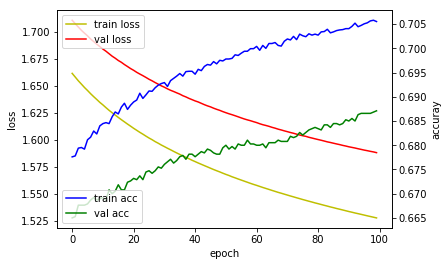

In [0]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

##Export Model

<br/>

Model의 Architecture와 Parameter를 External File로 Export합니다.

아래 코드 셀의 **model_name** 변수에 자신의 Model 이름을 작은따옴표 안에 넣어 저장해 주세요!

Ex) model_name = 'jaehyunlee'

<br/>

In [0]:
model_name = 

In [0]:
import json

In [0]:
# Save weights
model_weights = model_name + '_weights.h5'
model.save_weights(model_weights)
# Save model architecture
model_architecture = model_name + '_architecture.json'
with open(model_architecture, 'w') as f:
    f.write(model.to_json())

In [0]:
# Download files on Colab into Local Directory
from google.colab import files
files.download(model_weights)
files.download(model_architecture)

##Check if Model was correcly exported

<br/>

위에서 Export한 File이 잘 저장되었나 확인합니다.

아래 코드 셀들을 실행하여 **"Exported Model and Current Model are the Same"**이 나오면 문제없이 Export된 것입니다.

아니라면, 런타임을 초기화해서 다시 실행해 보세요...!

<br/>

In [0]:
model_weights = 'jaehyunlee_weights.h5'
model_architecture = 'jaehyunlee_architecture.json'

In [0]:
with open(model_architecture, 'r') as f:
    model_dummy = tf.keras.models.model_from_json(f.read())
model_dummy.load_weights(model_weights)

W0801 07:33:55.379884 140704307144576 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0801 07:33:55.381824 140704307144576 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1288: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0801 07:33:55.388376 140704307144576 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype

In [0]:
predict = model.predict(val_data)
predict_dummy = model_dummy.predict(val_data)

for i in range(len(val_data)):
    if np.argmax(predict[i]) != np.argmax(predict_dummy[i]):
        print("Exported Model and Current Model are Different...")
        break
    if i == len(val_data) - 1:
        print("Exported Model and Current Model are the Same")

Exported Model and Current Model are the Same


##Draw Test Data

<br/>

직접 Canvas에 그림을 그리면서 Model의 Prediction 결과를 확인해 봅시다!

code from, [[Colab Canvas](https://gist.github.com/korakot/8409b3feec20f159d8a50b0a811d3bca)]

<br/>

In [0]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename, w=100, h=100, line_width=8):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

In [0]:
import skimage as im

In [0]:
draw('test.jpg')

test_img = im.io.imread('test.jpg')
test_img = np.array(test_img)
test_img = test_img.transpose(2, 0, 1)[3] / 255
test_img = im.transform.resize(test_img, (28, 28), anti_aliasing=True)
test_img = test_img.reshape((1, 28, 28, 1))

prediction = model_dummy.predict(test_img)

print('Prediction : ' + chr(ascii_idx[np.argmax(prediction)]))

Prediction : K
